<a href="https://colab.research.google.com/github/plaban1981/churn-prediction/blob/master/Customer_Propensity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predictive Analytiytics Model to predict the likelihood that a prospective customer will buy a bike.

#### Import training data

In [1]:
from google.colab  import files
files.upload()

Saving BBC.csv to BBC.csv


{'BBC.csv': b'MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer\r\n5,1,90000,2,0,5,1,0,2,2,50,1\r\n5,1,60000,3,3,5,0,1,1,2,51,1\r\n5,1,60000,3,3,5,1,1,5,2,51,1\r\n5,2,70000,0,0,5,0,1,10,2,49,1\r\n5,2,80000,5,5,5,1,4,2,2,48,1\r\n5,1,70000,0,0,5,1,1,10,2,51,1\r\n5,2,70000,0,0,5,1,1,10,2,51,1\r\n5,1,60000,3,3,5,1,2,1,2,52,1\r\n5,2,60000,4,4,5,1,3,20,2,52,1\r\n5,1,70000,0,0,5,0,1,10,2,52,1\r\n5,2,70000,0,0,5,0,1,10,2,53,1\r\n5,1,60000,4,4,5,1,4,20,2,53,1\r\n5,2,100000,2,0,5,1,2,2,1,49,0\r\n5,1,100000,2,0,5,1,3,1,1,48,0\r\n5,2,100000,3,0,5,0,3,2,1,48,0\r\n3,2,30000,0,0,3,0,1,10,1,38,1\r\n3,1,30000,0,0,3,1,1,10,1,37,1\r\n1,2,20000,4,0,1,1,2,10,2,72,1\r\n3,1,30000,2,0,3,1,2,10,2,72,1\r\n1,1,40000,0,0,1,0,2,10,1,39,0\r\n1,1,40000,0,0,1,0,2,2,1,38,1\r\n3,2,40000,0,0,3,0,1,2,1,38,1\r\n3,1,40000,0,0,3,1,1,10,1,38,1\r\n3,1,40000,0,0,3,1,1,2,1,38,0\r\n3,1,60000,0,0,3,1,2,10,1,38,0\r\n2,1,10000,2,

## Import ML libraries to read data

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('BBC.csv')
df.head()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
0,5,1,90000,2,0,5,1,0,2,2,50,1
1,5,1,60000,3,3,5,0,1,1,2,51,1
2,5,1,60000,3,3,5,1,1,5,2,51,1
3,5,2,70000,0,0,5,0,1,10,2,49,1
4,5,2,80000,5,5,5,1,4,2,2,48,1


In [4]:
df.BikeBuyer.value_counts()

0    9352
1    9132
Name: BikeBuyer, dtype: int64

## Visualization of realtionship between Features and label BikeBuyer

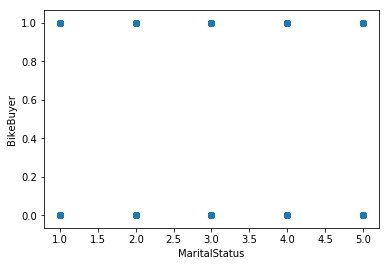

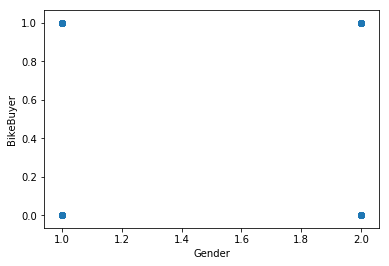

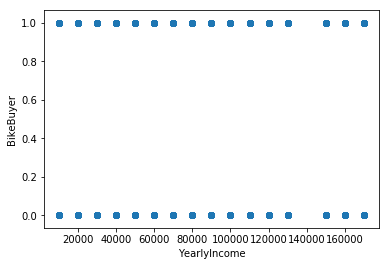

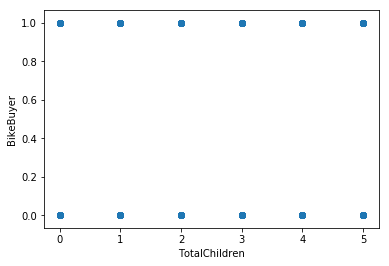

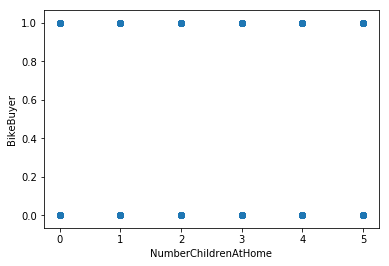

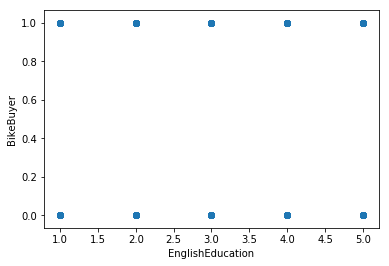

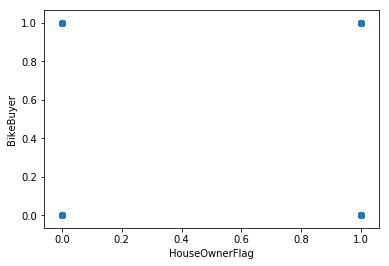

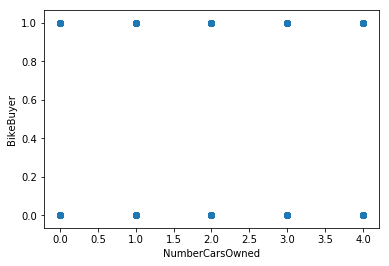

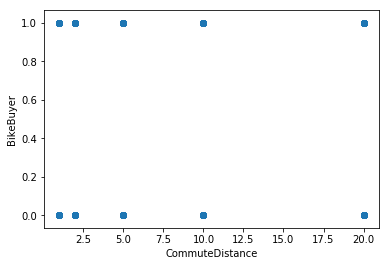

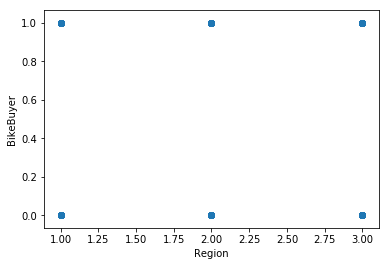

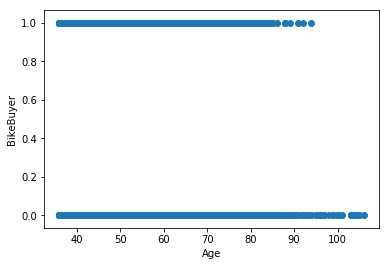

In [5]:
for i in df.columns :
  if i != 'BikeBuyer':
    plt.scatter(df[i].values,df['BikeBuyer'].values)
    plt.ylabel('BikeBuyer')
    plt.xlabel(i)
    plt.show()
    print('='*80)

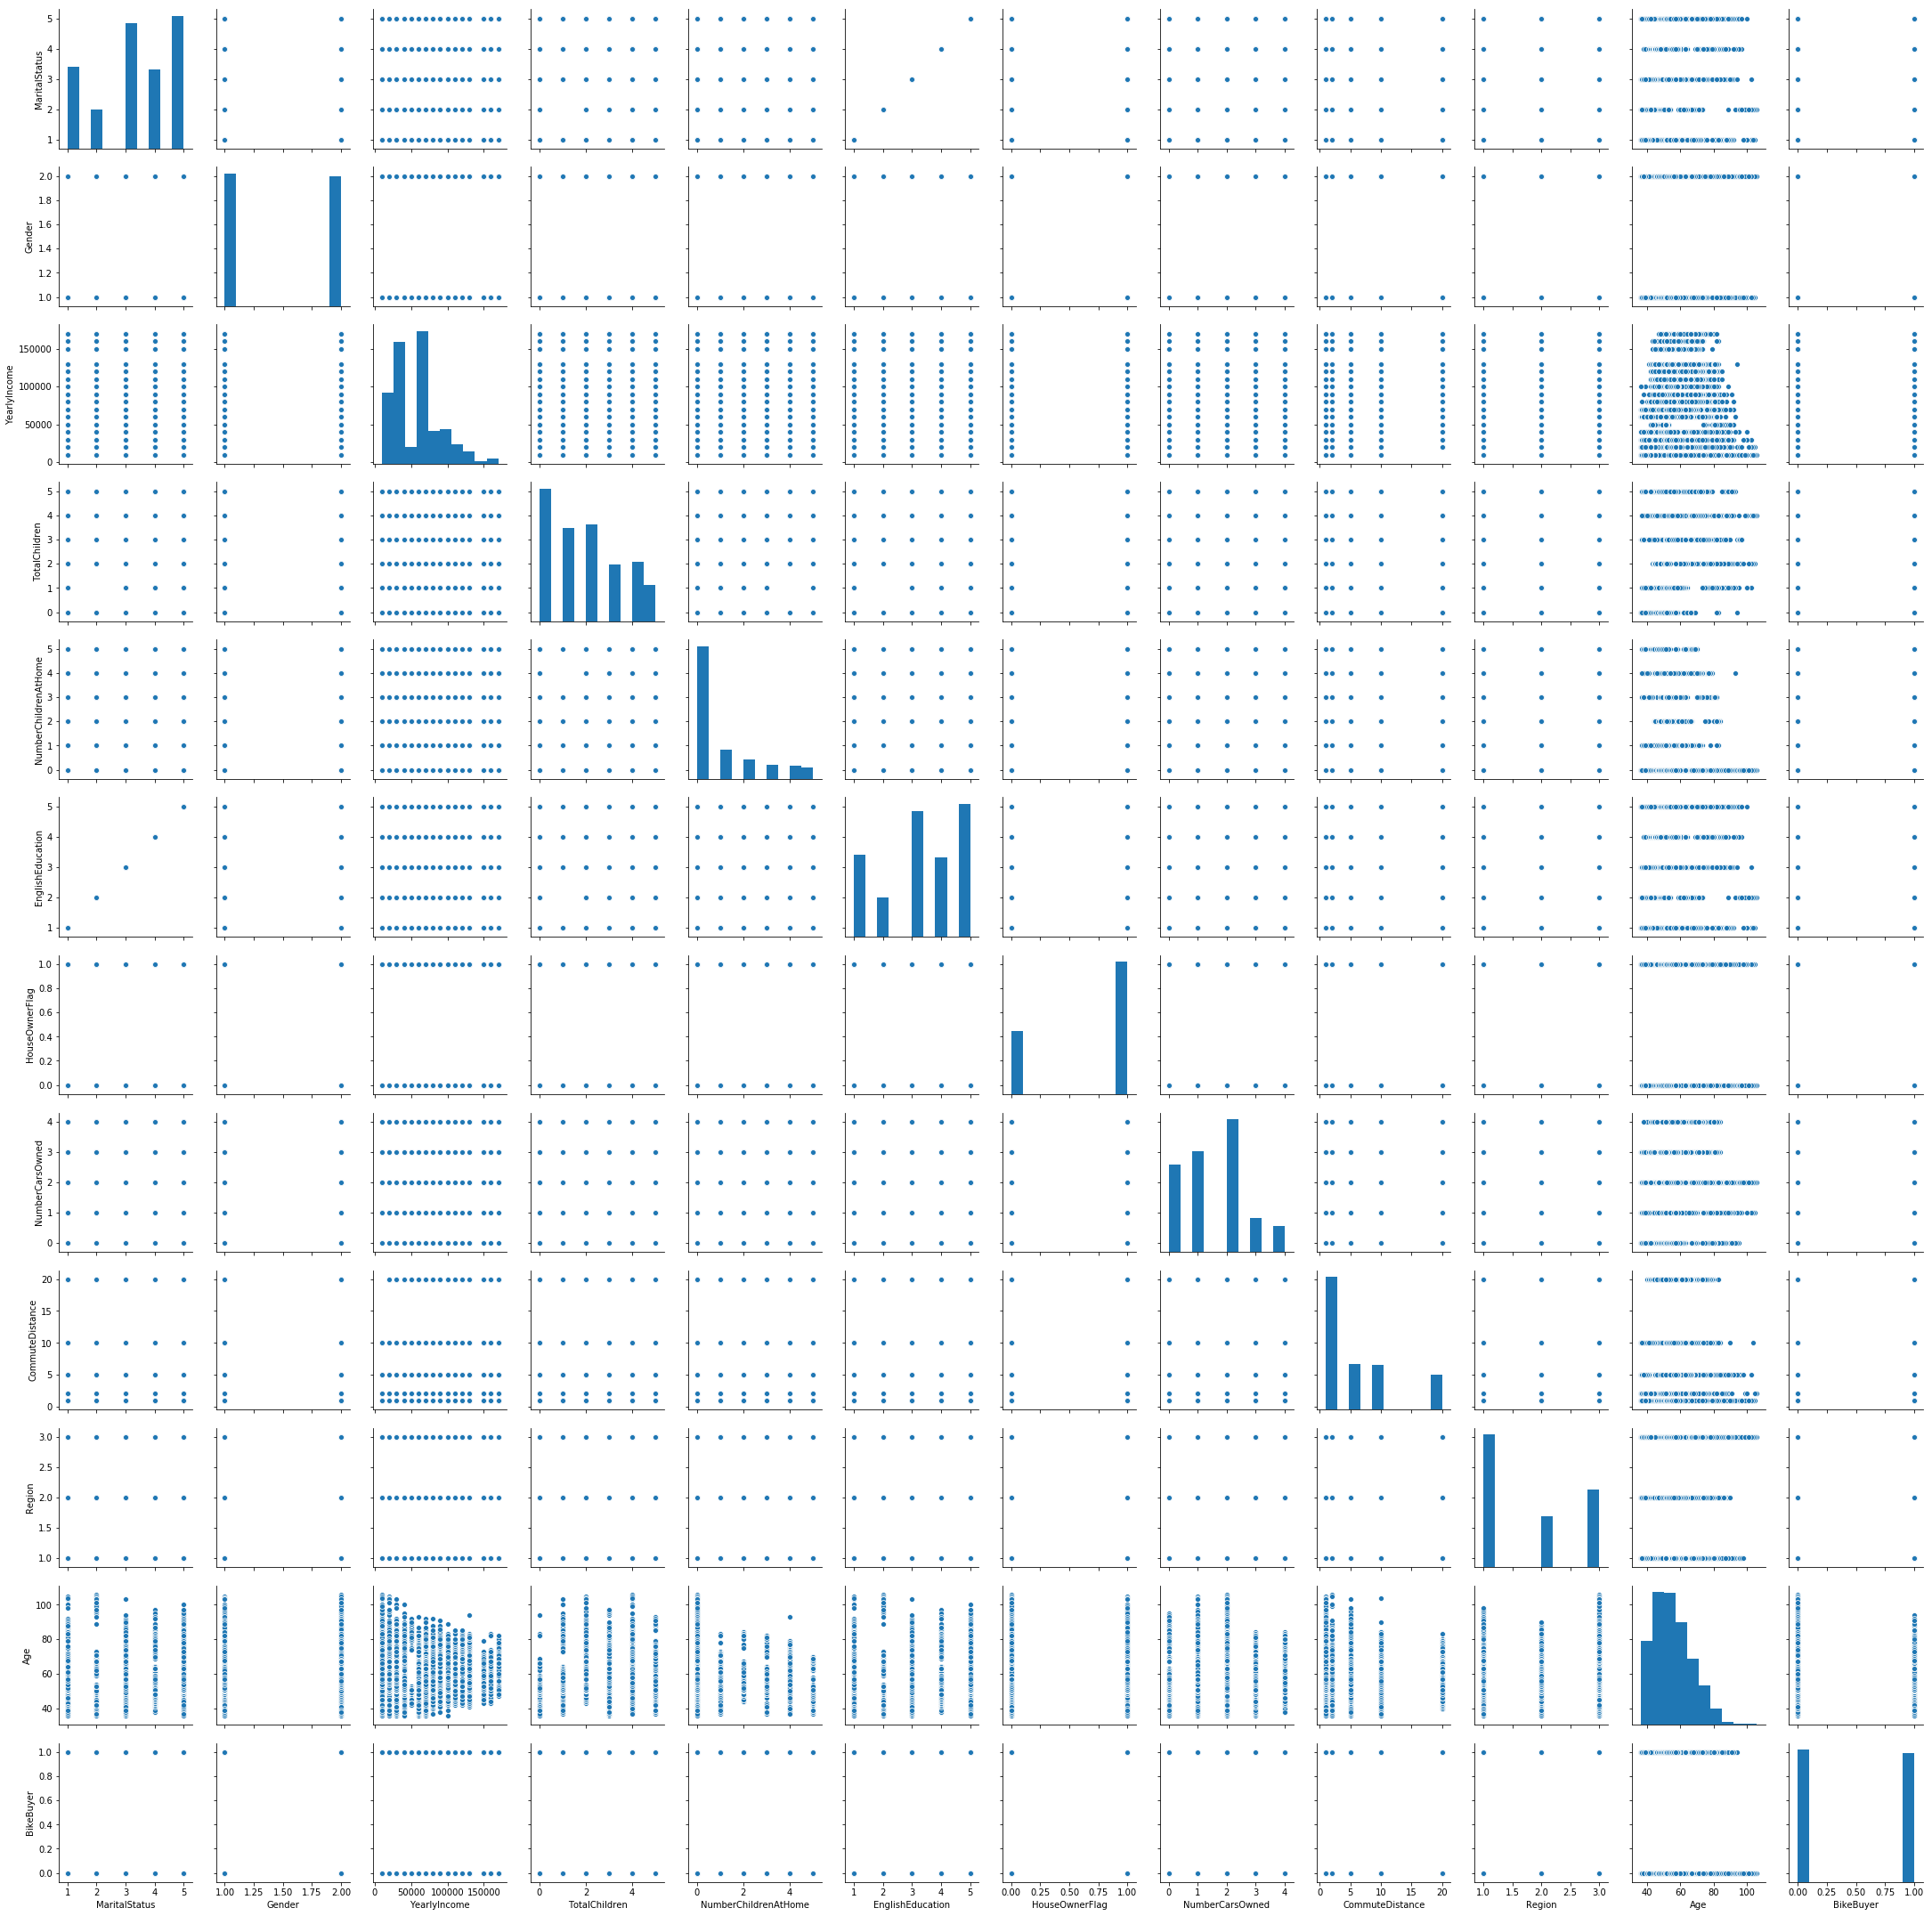

In [6]:
sns.pairplot(df)

## Linear Corelation between Attributes

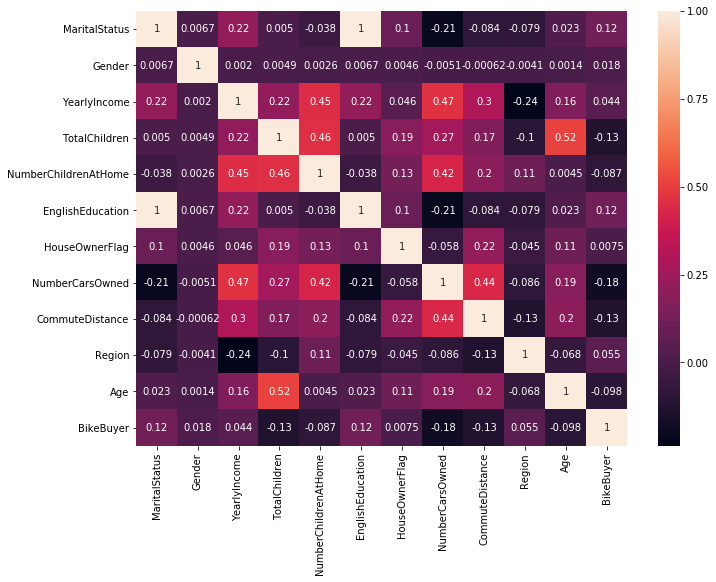

In [7]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),annot=True)

## Descriptive Statistics of the features

In [8]:
df.describe()

,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,EnglishEducation,HouseOwnerFlag,NumberCarsOwned,CommuteDistance,Region,Age,BikeBuyer
count,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000,18484.000000
mean,3.310106,1.494103,57305.777970,1.844352,1.004058,3.310106,0.676369,1.502705,6.003246,1.789710,54.603928,0.494049
std,1.426147,0.499979,32285.841703,1.612408,1.522660,1.426147,0.467874,1.138394,6.382562,0.872664,11.255252,0.499978
min,1.000000,1.000000,10000.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,36.000000,0.000000
25%,2.000000,1.000000,30000.000000,0.000000,0.000000,2.000000,0.000000,1.000000,1.000000,1.000000,46.000000,0.000000
50%,3.000000,1.000000,60000.000000,2.000000,0.000000,3.000000,1.000000,2.000000,2.000000,1.000000,53.000000,0.000000
75%,5.000000,2.000000,70000.000000,3.000000,2.000000,5.000000,1.000000,2.000000,10.000000,3.000000,62.000000,1.000000
max,5.000000,2.000000,170000.000000,5.000000,5.000000,5.000000,1.000000,4.000000,20.000000,3.000000,106.000000,1.000000


## Inter Quartile Range

In [0]:
IQR = np.percentile(df.YearlyIncome.values,75 )- np.percentile(df.YearlyIncome.values,25)

In [10]:
IQR,1.5 * IQR 

(40000.0, 60000.0)

In [11]:
df.shape

(18484, 12)

## Determine Outliers if any for feature YearlyIncome

In [13]:
df[(df.YearlyIncome  < 1.5 * IQR) | (df.YearlyIncome > 1.5 * IQR) ].shape

(15357, 12)

## Visualization of Yearly Income to determine if any outliers

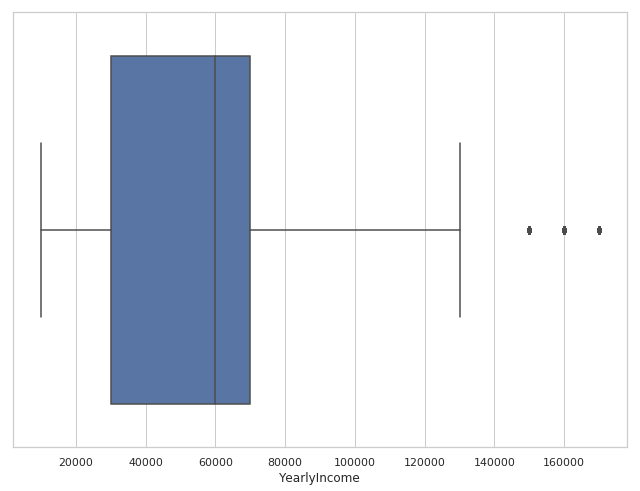

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(11,8))
sns.boxplot(x='YearlyIncome',data=df)

#### Yearly Income Histogram plot

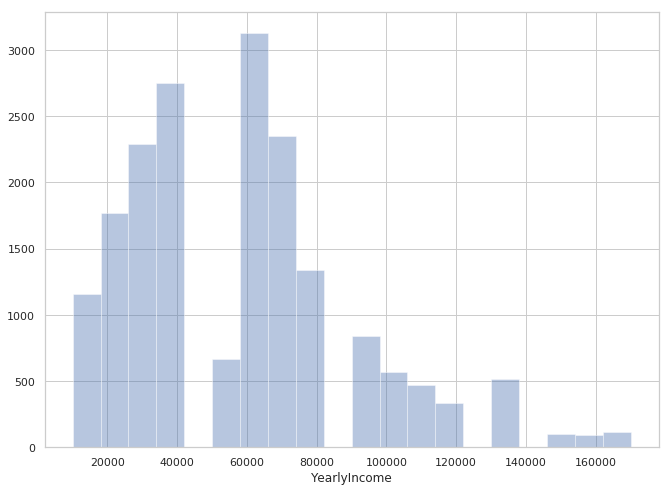

In [20]:
plt.figure(figsize=(11,8))
sns.distplot(df['YearlyIncome'],kde=False,bins=20)

## Since outliers in YearlIncome, we apply Log10 transformation as we need to retain all values .

In [0]:
df_new = df.copy()
df_new['YearlyIncome'] = df_new['YearlyIncome'].apply(lambda x : np.log10(x) )

## Checking for Outliers if any after data preprocessing 

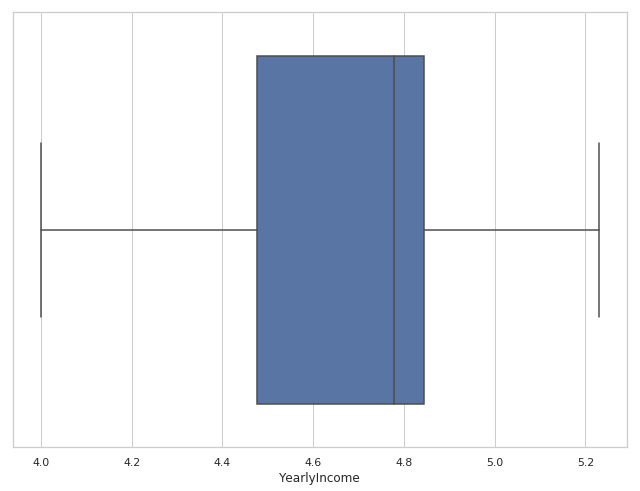

In [22]:
sns.set(style="whitegrid")
plt.figure(figsize=(11,8))
sns.boxplot(x='YearlyIncome',data=df_new)

## Check for missing data

In [23]:
df_new.isnull().sum()[df_new.isnull().sum() > 0]

Series([], dtype: int64)

#### No missing values detected.

## Feature Selction

#### Benefits of performing feature selection before modeling your data?
· **Reduces Overfitting:** Less redundant data means less opportunity to make decisions based on noise.

· **Improves Accuracy:** Less misleading data means modeling accuracy improves.

· **Reduces Training Time:** fewer data points reduce algorithm complexity and algorithms train faster.

## Apply SelectKBest class to extract top 10 best features - Univariate Selection

In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_features = SelectKBest(score_func=chi2,k=11)
X = df_new.drop('BikeBuyer',axis=1)
Y = df_new['BikeBuyer']
fit = best_features.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)


## Concatenate scores and columns

In [0]:
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Feature','Score'] 

In [26]:
print(featureScores.sort_values(by='Score',ascending=False))

                 Feature        Score
8        CommuteDistance  2132.380544
7        NumberCarsOwned   521.427063
3          TotalChildren   421.237092
10                   Age   413.846464
4   NumberChildrenAtHome   320.866825
0          MaritalStatus   175.885682
5       EnglishEducation   175.885682
9                 Region    24.203207
2           YearlyIncome     1.126145
1                 Gender     1.042947
6         HouseOwnerFlag     0.335929


##Preaparing the training data based on highest Feature Scores

In [27]:
feature_list = []
for features,score in featureScores.sort_values(by='Score',ascending=False).values:
  if score >=1 :
    feature_list.append(features)
print(feature_list)

['CommuteDistance', 'NumberCarsOwned', 'TotalChildren', 'Age', 'NumberChildrenAtHome', 'MaritalStatus', 'EnglishEducation', 'Region', 'YearlyIncome', 'Gender']


## Select Features and Label for training the model.

In [0]:
X = df_new[feature_list]
Y = df_new['BikeBuyer']

## Checking whether the data is imbalanced

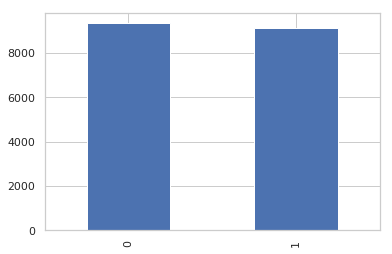

In [38]:
Y.value_counts().plot(kind='bar')

#### From the above countplot it is evident that the data is not imbalanced.

## Applying Various Classification Models

In [0]:
#!pip install scikit-plot

## Split the data into  training and validation set

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

## Logistic Regression Model

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score


## Train the Model

In [34]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
lr_pred_proba = lr.predict_proba(X_test)

## Accuracy Score

In [41]:
print(f'Accuracy Score of the model on validation data {accuracy_score(y_test,lr_pred) * 100}%')

Accuracy Score of the model on validation data 61.61752772518258%


## Precision Score ==> rate of true positives in the results 

In [42]:
print(f'Precision Score of the model on validation data  {precision_score(y_test,lr_pred)}')

Precision Score of the model on validation data  0.6130483689538808


## Recall ==> percentage of true positives the model identifies 

In [43]:
print(f'Recall Score of the model on validation data {recall_score(y_test,lr_pred)}')

Recall Score of the model on validation data 0.598572213069742


## Confusion Matrix 

In [0]:
lr_cm = confusion_matrix(y_test, lr_pred) 

In [0]:
# Transform to df for easier plotting
cm_df = pd.DataFrame(lr_cm,
                     index = ['Not Buy Bike ','Buy Bike'], 
                     columns = ['Not Buy Bike ','Buy Bike'])

In [48]:
print(cm_df)

               Not Buy Bike   Buy Bike
Not Buy Bike            1188       688
Buy Bike                 731      1090


## Confusion Matrix

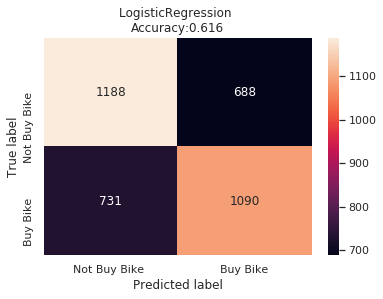

In [50]:
#pass fmt='g' to the heatmap call to keep numbers from going to scientific notation
#pass cmap='Greens' to the heatmap call to have intuitive color meaning.
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('LogisticRegression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, lr_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## ROC Curve

In [52]:
!pip install scikit-plot

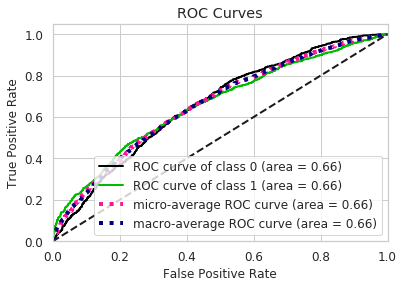

In [53]:
import scikitplot
scikitplot.metrics.plot_roc(y_test,lr_pred_proba)

## Hyperparameter tuning - Logistic Regerssion

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}

In [0]:
lr_random = RandomizedSearchCV(lr,param_distributions=grid_values,n_iter=30,cv=5,random_state=1,n_jobs=4)

In [58]:
lr_random.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 14 is smaller than n_iter=30. Running 14 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=30, n_jobs=4,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'penalty': ['l1', 'l2']},
                   pre_dispatch='2*n_jobs', random_state=1, refit=True,
        

## Best Parameters detrmined

In [59]:
lr_random.best_params_

{'C': 10, 'penalty': 'l2'}

## Best Estimator values

In [61]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [62]:
lr_random.best_estimator_

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
lr = lr_random.best_estimator_
lr.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions

In [0]:
lr_pred = lr.predict(X_test)

In [65]:
print(f'Accuracy Score of the model on validation data {accuracy_score(y_test,lr_pred) * 100}%')

Accuracy Score of the model on validation data 61.9421152285637%


## Applying Logistic Regression Cross validation model

In [68]:
from sklearn.linear_model import LogisticRegressionCV
lr_cv = LogisticRegressionCV(cv=5,max_iter=200)
lr_cv.fit(X_train,y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=200, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [0]:
lr_cv_pred = lr_cv.predict(X_test)

## Accuracy Score - LogisticRegressionCV

In [70]:
print(f'Accuracy Score of the model on validation data {accuracy_score(y_test,lr_cv_pred) * 100}%')

Accuracy Score of the model on validation data 62.023262104408985%


In [0]:
lr_cv_cm = confusion_matrix(y_test,lr_cv_pred)

In [0]:
# Transform to df for easier plotting
lr_cv_cm_df = pd.DataFrame(lr_cv_cm,
                     index = ['Not Buy Bike ','Buy Bike'], 
                     columns = ['Not Buy Bike ','Buy Bike'])

## Confusion Matrix - LogisticRegressionCV

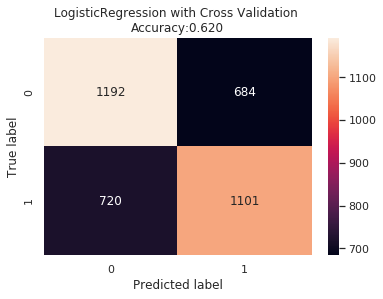

In [74]:
sns.heatmap(lr_cv_cm,fmt='g',annot=True)
plt.title('LogisticRegression with Cross Validation \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, lr_cv_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Applying  Random Forest Classification  Model

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_pred  = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test) 

## Accuracy score - RandomForestClassifier

In [0]:
print(f'Accuracy Score of the model on validation data {accuracy_score(y_test,rf_pred) * 100}%')

Accuracy Score of the model on validation data 77.79280497700839%


## Confusion Matrix - RandomForestClassifier

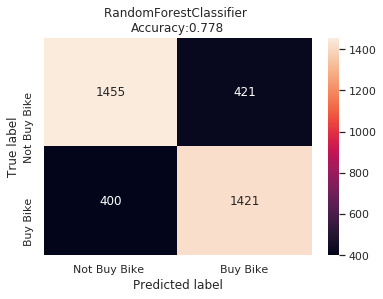

In [0]:
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cm_df = pd.DataFrame(rf_cm,
                     index = ['Not Buy Bike ','Buy Bike'], 
                     columns = ['Not Buy Bike ','Buy Bike'])

#

sns.heatmap(rf_cm_df, annot=True,fmt='g')
plt.title('RandomForestClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, rf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## ROC Curve

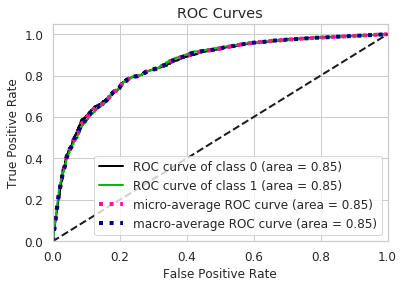

In [0]:
scikitplot.metrics.plot_roc(y_test,rf_pred_proba)

## Classification Report

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1876
           1       0.77      0.78      0.78      1821

    accuracy                           0.78      3697
   macro avg       0.78      0.78      0.78      3697
weighted avg       0.78      0.78      0.78      3697



## Hyperparameter Tuning

#### we will try adjusting the following set of hyperparameters:

- n_estimators = number of trees in the foreset

- max_features = max number of features considered for splitting a node

- max_depth = max number of levels in each decision tree

- min_samples_split = min number of data points placed in a node before the node is split

- min_samples_leaf = min number of data points allowed in a leaf node

- bootstrap = method for sampling data points (with or without replacement)

In [0]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(100, 500, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

## Create the random grid

In [0]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

## Random Search Training

In [0]:
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=30,cv=5,verbose=2,random_state=1,n_jobs=4)

## Fit the random search model


In [0]:
rf_random.fit(X,Y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:  3.2min
[Parallel(n_jobs=4)]: Done 150 out of 150 | elapsed: 11.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    n_jobs=None,
 

In [0]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 400}

In [0]:
rf = rf_random.best_estimator_

In [0]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=100, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Evaluate Random Search

In [0]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    #mape = 100 * np.mean(errors / test_labels)
    accuracy = accuracy_score(predictions ,test_labels)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [0]:
base_model = RandomForestClassifier(n_estimators=100,random_state=1)
base_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [0]:
base_accuracy = evaluate(base_model, X_test,y_test)

Model Performance
Average Error: 0.2267 degrees.
Accuracy = 0.77%.


In [0]:
random_accuracy = evaluate(rf ,X_test,y_test)

Model Performance
Average Error: 0.2156 degrees.
Accuracy = 0.78%.


In [0]:
print('Improvement of accuracy {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of accuracy 1.43%.


In [0]:
rf_pred  = rf.predict(X_test)
rf_pred_proba = rf.predict_proba(X_test)

## Accuracy Score - Ranomized Search

In [0]:
print(f'Accuracy Score of the model on validation data {accuracy_score(y_test,rf_pred) * 100}%')

Accuracy Score of the model on validation data 78.44197998377062%


## Confusion Matrix

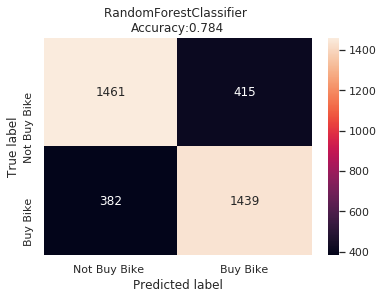

In [0]:
rf_cm = confusion_matrix(y_test,rf_pred)
rf_cm_df = pd.DataFrame(rf_cm,
                     index = ['Not Buy Bike ','Buy Bike'], 
                     columns = ['Not Buy Bike ','Buy Bike'])

#

sns.heatmap(rf_cm_df, annot=True,fmt='g')
plt.title('RandomForestClassifier \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, rf_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Applying Support Vector Machine

In [0]:
from sklearn.svm import SVC

In [78]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
svc_pred = svc.predict(X_test)

## Accuracy Score - Support Vector Machine

In [80]:
print(f'Accuracy Score of the model on validation data {accuracy_score(y_test,svc_pred) * 100}%')

Accuracy Score of the model on validation data 61.99621314579389%
